In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [6]:
df = pd.read_csv("AAPL.csv", na_values=['null'], index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-16,15.232857,15.382500,15.148929,15.364286,13.339229,216538000
2013-07-17,15.346429,15.436429,15.293571,15.368214,13.342637,198990400
2013-07-18,15.477857,15.531071,15.378929,15.420000,13.387598,218878800
2013-07-19,15.467857,15.499286,15.155357,15.176786,13.176443,268721600
2013-07-22,15.337857,15.348214,15.195357,15.225357,13.218610,207796400


In [8]:
print("Dataframe Shape:", df.shape)
print("Null Value Present:", df.isnull().values.any())

Dataframe Shape: (2517, 6)
Null Value Present: False


<Axes: xlabel='Date'>

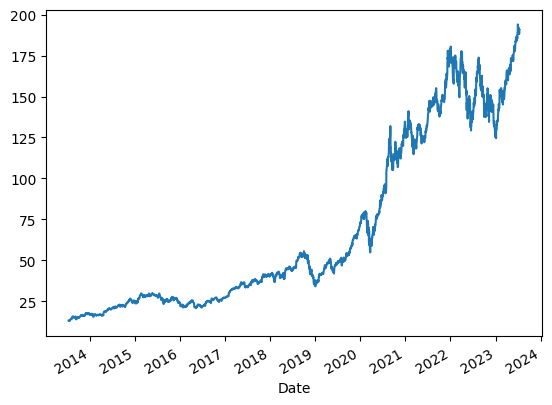

In [10]:
df['Adj Close'].plot()

In [26]:
output_var = pd.DataFrame(df['Adj Close'])
features = ['Open']

In [44]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open
Date,
2013-07-16,0.000104
2013-07-17,0.000740
2013-07-18,0.001476
2013-07-19,0.001420
2013-07-22,0.000692


In [28]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [29]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [30]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
287/287 [==============================] - 7s 5ms/step - loss: 5241.1626
Epoch 2/100
287/287 [==============================] - 2s 5ms/step - loss: 4515.7124
Epoch 3/100
287/287 [==============================] - 2s 6ms/step - loss: 3861.7864
Epoch 4/100
287/287 [==============================] - 2s 5ms/step - loss: 3322.3301
Epoch 5/100
287/287 [==============================] - 2s 6ms/step - loss: 2911.6116
Epoch 6/100
287/287 [==============================] - 2s 5ms/step - loss: 2610.2322
Epoch 7/100
287/287 [==============================] - 1s 5ms/step - loss: 2392.2712
Epoch 8/100
287/287 [==============================] - 2s 6ms/step - loss: 2234.5630
Epoch 9/100
287/287 [==============================] - 2s 5ms/step - loss: 2118.4077
Epoch 10/100
287/287 [==============================] - 2s 5ms/step - loss: 2028.9100
Epoch 11/100
287/287 [==============================] - 2s 6ms/step - loss: 1953.6840
Epoch 12/100
287/287 [==============================] - 2s 6ms/

Epoch 98/100
287/287 [==============================] - 3s 10ms/step - loss: 3.1435
Epoch 99/100
287/287 [==============================] - 3s 11ms/step - loss: 3.0514
Epoch 100/100
287/287 [==============================] - 4s 14ms/step - loss: 2.9626


In [32]:
y_pred= lstm.predict(X_test)

8/8 [==============================] - 4s 11ms/step


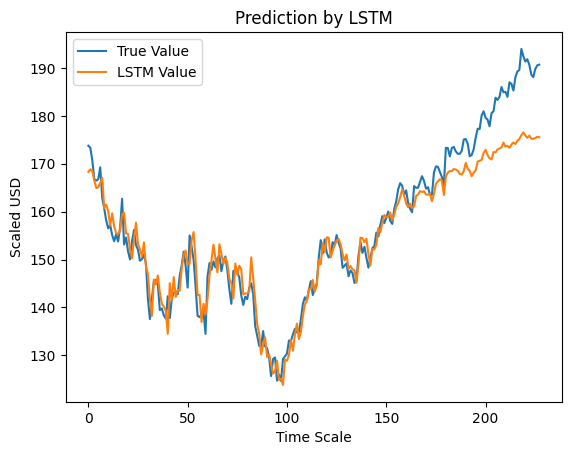

In [33]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [53]:
openp = float(input())
scaledopenp = scaler.fit_transform([[openp]])
scaledopenp = scaledopenp.reshape(1, 1, scaledopenp.shape[1])
expectedclosep = lstm.predict(scaledopenp)
expectedclosep = scaler.inverse_transform(expectedclosep)
print("Expected Close Price:", expectedclosep[0, 0])

158.11
1/1 [==============================] - 0s 62ms/step
Expected Close Price: 169.37671
